# WeatherPy
___


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List
---

In [3]:
# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

# Lists for holding latitudes-longitudes and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low = -90.000, high = 90.000, size = 1200)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1200)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    
    City = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    
    # If the city is unique, then add it to cities list
    
    if City not in cities:
        cities.append(City)
        
# Print the city count and cities list

print(f'\n{len(cities)} cities are selected.\n')
print(cities)


513 cities are selected.

['Saint-philippe', 'Cockburn town', 'Nikolskoye', 'Saint-pacome', 'Taolanaro', 'Hobart', 'Tsihombe', 'Punta arenas', 'Saldanha', 'Vaini', 'Bluff', 'Dikson', 'Kapaa', 'Dosso', 'Sturgeon bay', 'Bubaque', 'Atambua', 'Butaritari', 'Airai', 'Poum', 'Nioro', 'Ordynskoye', 'Puerto del rosario', 'Henties bay', 'Songadh', 'Asosa', 'Kijang', 'Hilo', 'Vaitupu', 'Luderitz', 'Qaanaaq', 'Bethel', 'Khatanga', 'Grand river south east', 'Paralimni', 'Jiddah', 'Attawapiskat', 'Vao', 'Upernavik', 'Komsomolskiy', 'Iqaluit', 'Sambava', 'Bandarbeyla', 'Ushuaia', 'Mataura', 'Hermanus', 'Belushya guba', 'Hervey bay', 'Ossora', 'Atuona', 'Ugoofaaru', 'Naron', 'Tasiilaq', 'Biograd na moru', 'Lom sak', 'Katangli', 'Abu samrah', 'Nizhneyansk', 'Cape town', 'Isangel', 'La ronge', 'Jamestown', 'Mar del plata', 'Rafaela', 'Ambilobe', 'Rikitea', 'Port alfred', 'Meulaboh', 'Chuy', 'Pevek', 'Panjab', 'Pundaguitan', 'Conde', 'Tuktoyaktuk', 'Vinzili', 'Sangar', 'Yakeshi', 'Barentsburg', 'Flinde

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}

base_url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&q="


Cities_Data = []


for i, City in enumerate(cities):
    
    query_url = base_url + str(City) + "&appid=" + weather_api_key
    
    try:
        
        data = requests.get(query_url).json()
        
        Country = data['sys']['country']
        
        print(f'{i}. Processing data for {City}, {Country}')
        
        latitude = data["coord"]["lat"]
        
        longitude = data["coord"]["lon"]
        
        temperature = data["main"]["temp_max"]
        
        humidity = data["main"]["humidity"]
        
        Cloudiness = data["clouds"]["all"]
        
        Wind_speed = data["wind"]["speed"]
        
        Cities_Data.append({
                          "City" : City,
                          "Country" : Country,
                          "Latitude" : latitude,
                          "Longitude" : longitude,
                          "Max Temp" : temperature,
                          "Humidity" : humidity,
                          "Cloudiness" : Cloudiness,
                          "Wind Speed" : Wind_speed
                         })
        
    except:
        print(f'\n{i}. City - {City} is not found! Skipping.....\n')
        pass
    
              
# Indicate that Data Loading is complete

print("\n^^^^^^^^^^^^^^^^^^^^^^^^")
print("Data Retrieval Complete      ")
print("\n^^^^^^^^^^^^^^^^^^^^^^^^\n")

0. Processing data for Saint-philippe, RE
1. Processing data for Cockburn town, TC
2. Processing data for Nikolskoye, RU

3. City - Saint-pacome is not found! Skipping.....


4. City - Taolanaro is not found! Skipping.....

5. Processing data for Hobart, AU

6. City - Tsihombe is not found! Skipping.....

7. Processing data for Punta arenas, CL
8. Processing data for Saldanha, ZA
9. Processing data for Vaini, TO
10. Processing data for Bluff, NZ
11. Processing data for Dikson, RU
12. Processing data for Kapaa, US
13. Processing data for Dosso, NE
14. Processing data for Sturgeon bay, US
15. Processing data for Bubaque, GW
16. Processing data for Atambua, ID
17. Processing data for Butaritari, KI
18. Processing data for Airai, TL
19. Processing data for Poum, NC
20. Processing data for Nioro, GM
21. Processing data for Ordynskoye, RU
22. Processing data for Puerto del rosario, ES
23. Processing data for Henties bay, NA
24. Processing data for Songadh, IN
25. Processing data for Asosa, E

208. Processing data for Katsuura, JP

209. City - Kafar kama is not found! Skipping.....

210. Processing data for Nayoro, JP
211. Processing data for Trinidad, BO
212. Processing data for Krasnoselkup, RU
213. Processing data for Beberibe, BR
214. Processing data for Raghogarh, IN
215. Processing data for Whitehorse, CA
216. Processing data for Severo-kurilsk, RU
217. Processing data for Vicuna, CL
218. Processing data for Ucluelet, CA
219. Processing data for Narsaq, GL
220. Processing data for Torbay, CA
221. Processing data for Deming, US
222. Processing data for Takapau, NZ
223. Processing data for Martapura, ID
224. Processing data for Marsa matruh, EG
225. Processing data for Talcahuano, CL

226. City - Bolshoye sorokino is not found! Skipping.....

227. Processing data for Longyearbyen, SJ
228. Processing data for Muskegon, US
229. Processing data for Lompoc, US
230. Processing data for Carnarvon, AU

231. City - Doctor pedro p. pena is not found! Skipping.....

232. Processin

418. Processing data for Camalu, MX
419. Processing data for Karratha, AU
420. Processing data for Saskylakh, RU
421. Processing data for Acapulco, MX
422. Processing data for Sao geraldo do araguaia, BR
423. Processing data for Dolinsk, RU
424. Processing data for Didsbury, GB
425. Processing data for Port arthur, CN
426. Processing data for San-pedro, CI
427. Processing data for Denpasar, ID
428. Processing data for Key largo, US
429. Processing data for Gorontalo, ID
430. Processing data for Anloga, GH
431. Processing data for Yako, BF
432. Processing data for Kahului, US
433. Processing data for Prescott valley, US
434. Processing data for Kribi, CM
435. Processing data for Santa maria, BR
436. Processing data for Tambun, ID
437. Processing data for Tutoia, BR
438. Processing data for Lavrentiya, RU
439. Processing data for Moose factory, CA
440. Processing data for Hanmer springs, NZ
441. Processing data for Pampa, US
442. Processing data for Itarema, BR
443. Processing data for K

### Convert Raw Data to DataFrame

* Display the DataFrame
* Export the city data into a .csv.

In [12]:
# Convert the data into Pandas DataFrame
Cities_Data_df = pd.DataFrame(Cities_Data)

Cities_Data_df = Cities_Data_df.dropna()

Cities_Data_df = Cities_Data_df.set_index("City")


Cities_Data_df

,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
City,,,,,,,
Saint-philippe,RE,-21.36,55.77,73.40,73,42,8.05
Cockburn town,TC,21.46,-71.14,79.59,78,8,10.85
Nikolskoye,RU,59.70,30.79,35.60,93,87,2.24
Hobart,AU,-42.88,147.33,61.00,62,75,10.29
Punta arenas,CL,-53.15,-70.92,35.60,73,0,10.29
...,...,...,...,...,...,...,...
Hit,IQ,33.64,42.83,75.60,33,63,4.74
Neyshabur,IR,36.21,58.80,63.82,31,0,1.25
Port hueneme,US,34.15,-119.20,75.99,68,1,11.41


In [13]:
# Output File (CSV)
output_data_file = "Cities.csv"

# Export the City_Data into a csv
Cities_Data_df.to_csv(output_data_file, index_label="City")


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [14]:
# Extract relevant fields from the data frame

Latitudes = Cities_Data_df["Latitude"]
Longitudes = Cities_Data_df["Longitude"]
Temperatures = Cities_Data_df["Max Temp"]
Humudities = Cities_Data_df["Humidity"]
Cloudiness = Cities_Data_df["Cloudiness"]
Wind_speeds = Cities_Data_df["Wind Speed"]

#### Latitude vs. Temperature Plot

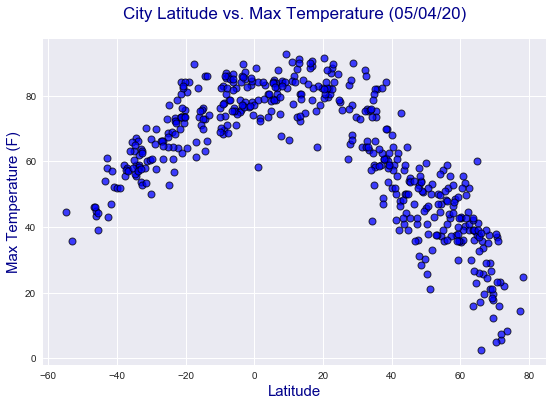

In [15]:
from matplotlib import style
style.use('seaborn')

# Build a scatter plot for latitude vs. temperature

plt.figure(figsize=(9, 6), facecolor = 'white')

plt.scatter(Latitudes, 
            Temperatures,
            facecolors = "blue",
            marker="o",
            edgecolor="k",
            linewidths=1,  
            alpha=0.75,
            label="Cities"
           )

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"), 
          color = "darkblue", fontsize = 17, pad = 20)

plt.xlabel("Latitude", color = "darkblue", fontsize = 15)
plt.ylabel("Max Temperature (F)", color = "darkblue", fontsize = 15)


plt.grid(True)

# Save the figure
plt.savefig("images/LatVsMaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

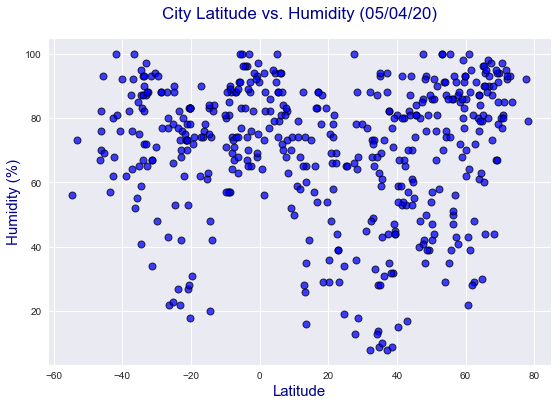

In [16]:
# Build a scatter plot for latitude vs. Humidity

plt.figure(figsize=(9,6), facecolor = 'white')

plt.scatter(Latitudes, 
            Humudities,
            facecolors = "b",
            marker="o",
            edgecolor="k",
            linewidths=1,  
            alpha=0.75,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"), 
          color = "darkblue", 
          fontsize = 17, 
          pad = 20)

plt.xlabel("Latitude", color = "darkblue", fontsize = 15)
plt.ylabel("Humidity (%)", color = "darkblue", fontsize = 15)

plt.grid(True)

# Save the figure
plt.savefig("images/LatVsHumidity.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

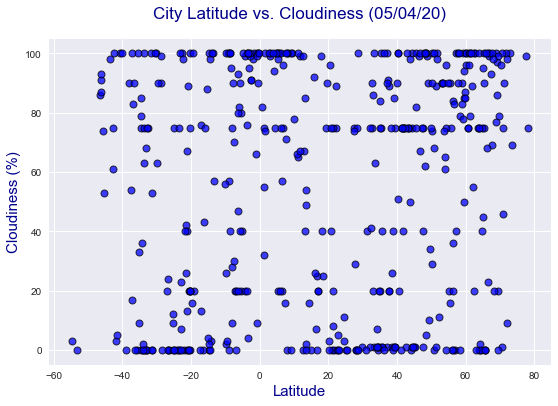

In [17]:
# Build a scatter plot for latitude vs. Cloudiness

plt.figure(figsize=(9,6),facecolor = 'white')

plt.scatter(Latitudes, 
            Cloudiness,
            facecolors = "blue",
            marker="o",
            edgecolor="k",
            linewidths=1,  
            alpha=0.75,
            label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"), color = "darkblue", fontsize = 17, pad = 20)

plt.xlabel("Latitude", color = "darkblue", fontsize = 15)
plt.ylabel("Cloudiness (%)", color = "darkblue", fontsize = 15)

plt.grid(True)

# Save the figure
plt.savefig("images/LatVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

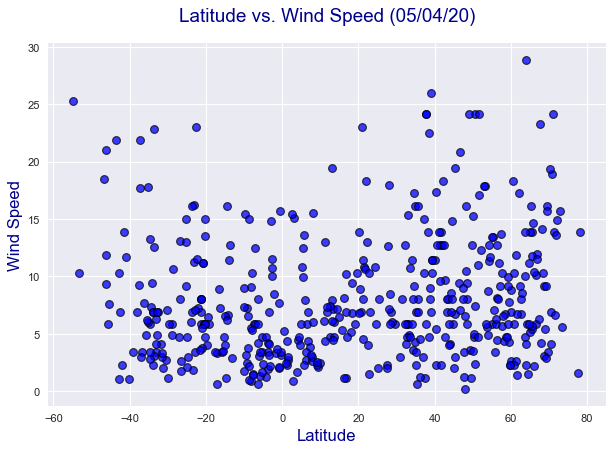

In [19]:
# Build a scatter plot for latitude vs. Wind Speed


plt.figure(figsize=(9,6), facecolor = 'white', dpi=80)

plt.scatter(Latitudes, 
            Wind_speeds,
            marker="o",
            facecolors = "b",
            edgecolor="k",
            linewidths=1,  
            alpha=0.75,
            label="Cities")

# Incorporate the other graph properties

plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"), color = "darkblue", fontsize = 17, pad = 20)

plt.xlabel("Latitude", color = "darkblue", fontsize = 15)
plt.ylabel("Wind Speed", color = "darkblue", fontsize = 15)

plt.grid(True)

# Save the figure

plt.savefig("images/LatVsWindSpd.png")

# Show plot

plt.show()


## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots

def linear_reg_plot(x_values, y_values, title, x_label, y_label, line_eq_coord):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    # Build the equation y = mx + c

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Build a scatter plot for the relevant fields
    
    plt.figure(figsize=(9,6))
    
    plt.scatter(x_values,y_values,
                facecolors = "blue",
                marker="o",
                edgecolor="darkblue",
                linewidths=1,  
                alpha=0.75)
    
    plt.plot(x_values,regress_values,"g-")
    
    # Incorporate the other graph properties
    
    plt.title(title, color = "darkblue", fontsize = 18, pad = 20)
    
    plt.xlabel(x_label, color = "darkblue", fontsize = 15)
    plt.ylabel(y_label, color = "darkblue", fontsize = 15)
    
    # Display the line equation on the map
    
    plt.annotate(line_eq, line_eq_coord, fontsize = 18, color = "darkblue")

    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemi_df = Cities_Data_df.loc[Cities_Data_df['Latitude']>=0]
Northern_hemi_df

,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
City,,,,,,,
Cockburn town,TC,21.46,-71.14,79.59,78,8,10.85
Nikolskoye,RU,59.70,30.79,35.60,93,87,2.24
Dikson,RU,73.51,80.55,8.22,85,69,5.61
Kapaa,US,22.08,-159.32,80.60,69,75,18.34
Dosso,NE,13.05,3.19,91.06,26,85,7.90
...,...,...,...,...,...,...,...
Grindavik,IS,63.84,-22.43,42.80,87,75,28.86
Hit,IQ,33.64,42.83,75.60,33,63,4.74
Neyshabur,IR,36.21,58.80,63.82,31,0,1.25


In [22]:
Southern_hemi_df = Cities_Data_df.loc[Cities_Data_df['Latitude']<0]
Southern_hemi_df

,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
City,,,,,,,
Saint-philippe,RE,-21.36,55.77,73.40,73,42,8.05
Hobart,AU,-42.88,147.33,61.00,62,75,10.29
Punta arenas,CL,-53.15,-70.92,35.60,73,0,10.29
Saldanha,ZA,-33.01,17.94,53.60,87,0,3.36
Vaini,TO,-21.20,-175.20,84.20,70,40,6.93
...,...,...,...,...,...,...,...
Port lincoln,AU,-34.73,135.87,64.89,41,85,13.24
Xai-xai,MZ,-25.05,33.64,67.55,90,0,2.10
Chiredzi,ZW,-21.05,31.67,62.49,73,67,5.53


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

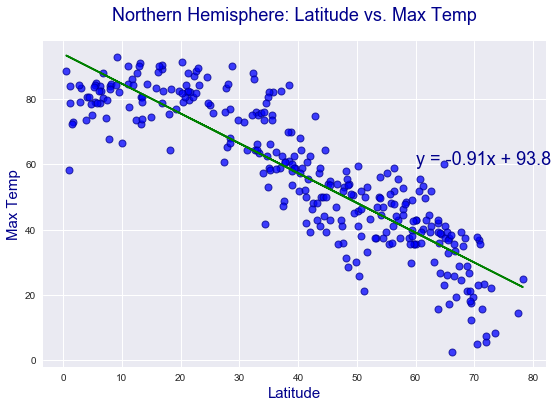

In [23]:
linear_reg_plot(Northern_hemi_df["Latitude"],
                Northern_hemi_df["Max Temp"],
                "Northern Hemisphere: Latitude vs. Max Temp",
                "Latitude",
                "Max Temp",
                (60,60))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

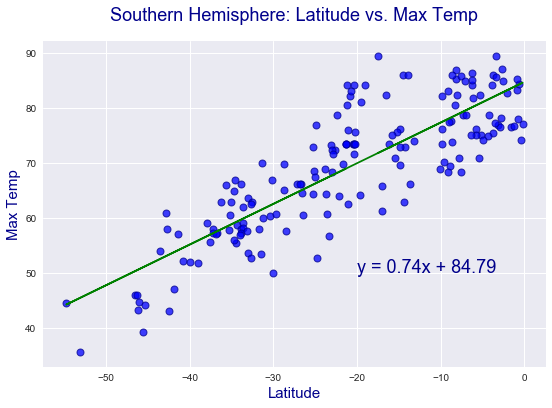

In [24]:
linear_reg_plot(Southern_hemi_df["Latitude"],
                Southern_hemi_df["Max Temp"],
                "Southern Hemisphere: Latitude vs. Max Temp",
                "Latitude",
                "Max Temp",
                (-20,50))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

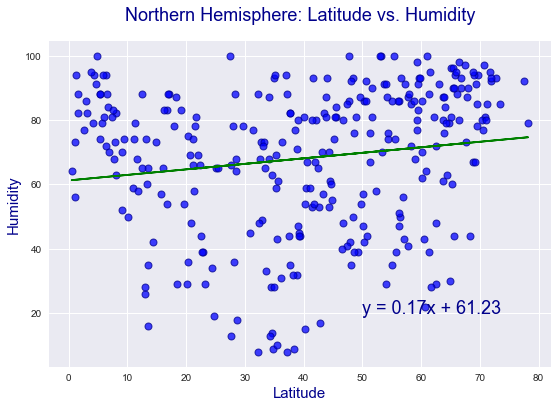

In [25]:
linear_reg_plot(Northern_hemi_df["Latitude"],
                Northern_hemi_df["Humidity"],
                "Northern Hemisphere: Latitude vs. Humidity",
                "Latitude",
                "Humidity",
                (50,20))


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

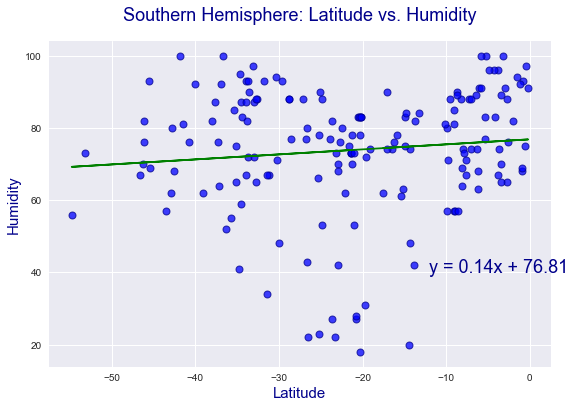

In [26]:
linear_reg_plot(Southern_hemi_df["Latitude"],
                Southern_hemi_df["Humidity"],
                "Southern Hemisphere: Latitude vs. Humidity",
                "Latitude",
                "Humidity",
                (-12,40))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

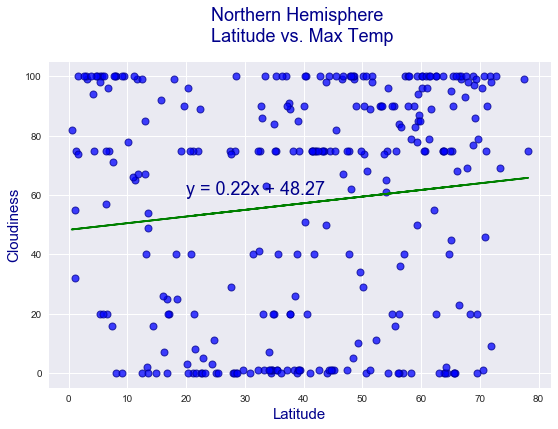

In [27]:
linear_reg_plot(Northern_hemi_df["Latitude"],
                Northern_hemi_df["Cloudiness"],
                "Northern Hemisphere \n Latitude vs. Max Temp",
                "Latitude",
                "Cloudiness",
                (20,60))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

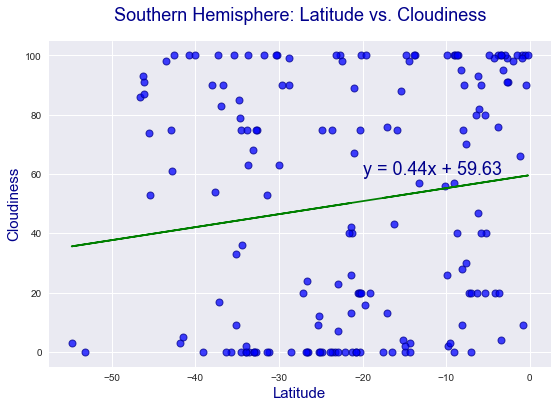

In [28]:
linear_reg_plot(Southern_hemi_df["Latitude"],
                Southern_hemi_df["Cloudiness"],
                "Southern Hemisphere: Latitude vs. Cloudiness",
                "Latitude",
                "Cloudiness",
                (-20,60))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

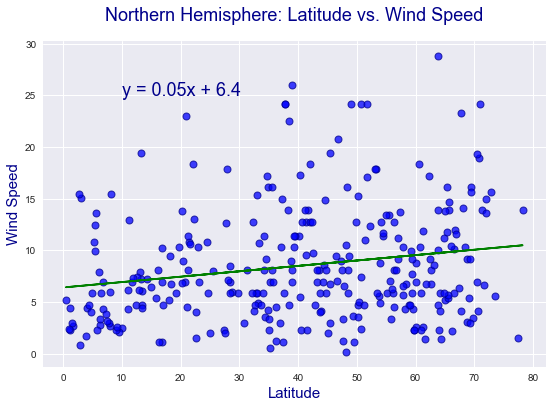

In [29]:
linear_reg_plot(Northern_hemi_df["Latitude"],
                Northern_hemi_df["Wind Speed"],
                "Northern Hemisphere: Latitude vs. Wind Speed",
                "Latitude",
                "Wind Speed",
                (10,25))


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

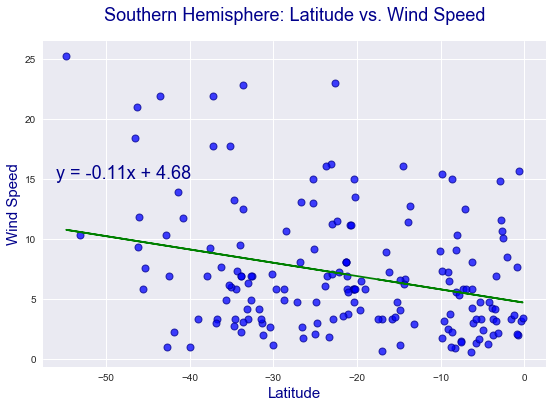

In [30]:
linear_reg_plot(Southern_hemi_df["Latitude"],
                Southern_hemi_df["Wind Speed"],
                "Southern Hemisphere: Latitude vs. Wind Speed",
                "Latitude",
                "Wind Speed",
                (-56,15))

In [33]:
# Read csv file named "sample" 
    
cities_data = pd.read_csv("Cities.csv") 

cities_data
  

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-philippe,RE,-21.36,55.77,73.40,73,42,8.05
1,Cockburn town,TC,21.46,-71.14,79.59,78,8,10.85
2,Nikolskoye,RU,59.70,30.79,35.60,93,87,2.24
3,Hobart,AU,-42.88,147.33,61.00,62,75,10.29
4,Punta arenas,CL,-53.15,-70.92,35.60,73,0,10.29
...,...,...,...,...,...,...,...,...
468,Hit,IQ,33.64,42.83,75.60,33,63,4.74
469,Neyshabur,IR,36.21,58.80,63.82,31,0,1.25
470,Port hueneme,US,34.15,-119.20,75.99,68,1,11.41
471,Papetoai,PF,-17.50,-149.87,89.60,62,0,3.36


In [34]:
# Save as html file named as "Table" 
cities_data.to_html("Table.html") 
  
# assign it to a  
# variable (string) 
html_file = cities_data.to_html() 
html_file.split()

['<table',
 'border="1"',
 'class="dataframe">',
 '<thead>',
 '<tr',
 'style="text-align:',
 'right;">',
 '<th></th>',
 '<th>City</th>',
 '<th>Country</th>',
 '<th>Latitude</th>',
 '<th>Longitude</th>',
 '<th>Max',
 'Temp</th>',
 '<th>Humidity</th>',
 '<th>Cloudiness</th>',
 '<th>Wind',
 'Speed</th>',
 '</tr>',
 '</thead>',
 '<tbody>',
 '<tr>',
 '<th>0</th>',
 '<td>Saint-philippe</td>',
 '<td>RE</td>',
 '<td>-21.36</td>',
 '<td>55.77</td>',
 '<td>73.40</td>',
 '<td>73</td>',
 '<td>42</td>',
 '<td>8.05</td>',
 '</tr>',
 '<tr>',
 '<th>1</th>',
 '<td>Cockburn',
 'town</td>',
 '<td>TC</td>',
 '<td>21.46</td>',
 '<td>-71.14</td>',
 '<td>79.59</td>',
 '<td>78</td>',
 '<td>8</td>',
 '<td>10.85</td>',
 '</tr>',
 '<tr>',
 '<th>2</th>',
 '<td>Nikolskoye</td>',
 '<td>RU</td>',
 '<td>59.70</td>',
 '<td>30.79</td>',
 '<td>35.60</td>',
 '<td>93</td>',
 '<td>87</td>',
 '<td>2.24</td>',
 '</tr>',
 '<tr>',
 '<th>3</th>',
 '<td>Hobart</td>',
 '<td>AU</td>',
 '<td>-42.88</td>',
 '<td>147.33</td>',
 '<td>